In [1]:
%matplotlib inline
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 3:  Root Finding and Optimization

## Question 1 - Newton's Method Convergence

Recall that Newton's method converges as

$$|\epsilon_{n+1}| = \frac{|f''(c)|}{2 |f'(x_n)|} |\epsilon_n|^2$$

with $\epsilon_n = x_n - x^*$ where $x^*$ is the true solution and $c$ is between $x_n$ and $x^*$.

**(a)** [10] Show that the Newton iteration when $f(x) = x^2 - M$ with $M > 0$ is

$$x_{n+1} = \frac{1}{2} \left (x_n + \frac{M}{x_n} \right )$$

Solution: Form equation for the line through the point (x$_k$, f(x$_k$)):
$$
\begin{align}
    f(x_n) &= f'(x_n)\cdot x_n + b \\
    f'(x_n)&= 2x_n \\
    \rightarrow \quad \quad \quad \quad y &= f'(x_n)\cdot x + f(x_n) - 2x_n^2 \\
    \rightarrow \quad \quad \quad \quad 0 &= 2x_n(x_{n+1}-x_n) + f(x_n) \\
    \text{Since} \quad \quad \quad f(x_n) &= x_n^2 - M \\
    x_{n+1} &= x_n - \frac{f(x_n)}{2x_n} \\
    &= x_n - (\frac{x_n}{2} - \frac{M}{2x_n}) \\
    &= \frac{1}{2} \left (x_n + \frac{M}{x_n}\right ) 
\end{align}
$$
This finishes the proof.

**(b)** [10] From this update scheme show that 

$$\frac{x_{n+1} - \sqrt{M}}{(x_n - \sqrt{M})^2} = \frac{1}{2 x_n}$$

Solution: Since 
$$
\begin{align}
    x_{n+1} &= \frac{1}{2} \left (x_n + \frac{M}{x_n}\right ) \\
    \rightarrow \quad x_{n+1} &= \frac{x_n}{2x_n} \left(x_n - 2x_n \sqrt{M} + 2x_n \sqrt{M} + \frac{M}{x_n} \right) \\
    &= \frac{1}{2x_n} \left(x_n - \sqrt{M} \right)^2 + \sqrt{M} \\
    x_{n+1} - \sqrt{M} &= \frac{1}{2x_n} \left(x_n - \sqrt{M} \right)^2 
\end{align}
$$
Then
$$
\frac{x_{n+1} - \sqrt{M}}{(x_n - \sqrt{M})^2} = \frac{1}{2 x_n}
$$
    

**(c)** [5] Confirm that the asymptotic error convergence matches the general convergence for Newton's method.

Solution: We know that 
$$
\begin{align}
\frac{|f''(c)|}{2 |f'(x_n)|} &= \frac{2}{2 \cdot 2x_n} \\
&= \frac{1}{2x_n}
\end{align}
$$
And that we also have the following 
$$
\frac{|\epsilon_{n+1}|}{|\epsilon_n|^2} = \frac{1}{2x_n}
$$
This confirm the match.

## Question 2 - Finding an Optimal Value Given Discrete Data

For the following questions we are given a set of data $(t_0, y_0), (t_1, y_1), \ldots, (t_N, y_N)$.

**(a)** [10] Write a function that takes in the data series $(t_i, y_i)$ and finds the value at a point $t_\ast$ by constructing the equation of the line between the two data points that bound $t_\ast$ and evaluating the resulting function at $t_\ast$.

Hints:
 - Make sure to handle the case that $t_\ast = t_i$.
 - If $t_\ast < t_0$ or $t_\ast > t_N$ then return the corresponding value $y_0$ or $y_N$.
 - If you write your function so that $t_\ast$ can be an array you can use the plotting code in the cell.  Otherwise just delete it.

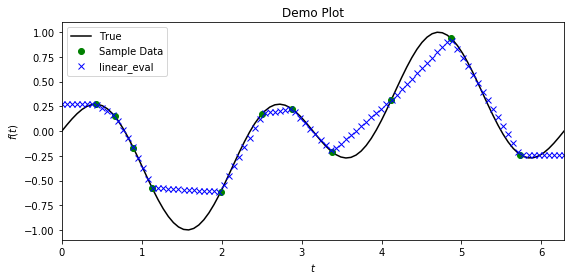

In [2]:
def linear_eval(t, y, t_star):
    if isinstance(t_star, float):
        t_star = [t_star]
        y_t_star = [0.0]
    else:
        y_t_star = numpy.zeros(t_star.shape)
    
    for (i, t_star_value) in enumerate(t_star):
        if t_star_value < t[0]:
            y_t_star[i] = y[0]
        elif t_star_value > t[-1]:
            y_t_star[i] = y[-1]
        else:
            for (n, t_value) in enumerate(t):
                if t_value > t_star_value:
                    y_t_star[i] = (y[n] - y[n-1]) / (t[n] - t[n-1]) * (t_star_value - t[n-1]) + y[n-1]
                    break
                elif t_value == t_star_value:
                    y_t_star[i] = y[n]
                    break
    return y_t_star

N = 10
t_fine = numpy.linspace(0.0, 2.0 * numpy.pi, 100)
t_rand = numpy.random.rand(N + 1) * (2.0 * numpy.pi)
t_rand.sort()
f = lambda x: numpy.sin(x) * numpy.cos(2.0 * x)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth()*1.5)
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_fine, f(t_fine), 'k-', label="True")
axes.plot(t_rand, f(t_rand), 'og', label="Sample Data")
axes.plot(t_fine, linear_eval(t_rand, f(t_rand), t_fine), 'xb', label="linear_eval")
axes.set_xlim((0, 2.0 * numpy.pi))
axes.set_title("Demo Plot")
axes.set_xlabel('$t$')
axes.set_ylabel('$f(t)$')
axes.legend()
plt.show()

In [3]:
N = 100
f = lambda x: numpy.sin(x) * numpy.cos(x)
t = numpy.linspace(-1, 1, N + 1)
t_star = 0.5
answer = linear_eval(t, f(t), t_star)
if isinstance(answer, list):
    answer = answer[0]
print("Computed solution: %s" % answer)
print("True solution: %s" % f(t_star))
numpy.testing.assert_almost_equal(answer, f(t_star), verbose=True, decimal=7)
print("Success!")

Computed solution: 0.42073549240394825
True solution: 0.42073549240394825
Success!


**(b)** [10] Using the function you wrote in part (a) write a function that uses Golden search to find the maximum of a series of data.  Again you can use the plotting code available if your `linear_eval` function from part (a) handles arrays.  Not that the initial bracket you are given will determine what maximum you will find.

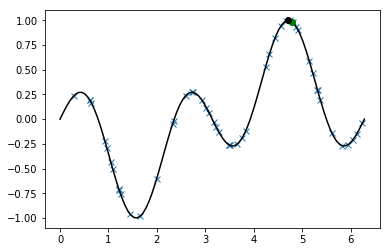

In [4]:
def golden_search(bracket, t, y, max_steps=100, tolerance=1e-4):
    f = lambda x: linear_eval(t, y, x)
    phi = (numpy.sqrt(5.0) - 1.0) / 2.0
    
    # Try with the ratio for maximum searching
    
    x = numpy.array([bracket[0], None, None, bracket[1]])
    x[1] = x[3] - phi * (x[3] - x[0])
    x[2] = x[0] + phi * (x[3] - x[0])
    
    success = False
    for n in range(max_steps + 1):
        f_1 = f(x[1])
        f_2 = f(x[2])
        
        if f_1 > f_2:
            x_new = [x[0], None, x[1], x[2]]
            x_new[1] = x[3] - phi * (x[3] - x[0])
        else:
            x_new = [x[1], x[2], None, x[3]]
            x_new[2] = x[0] + phi * (x[3] - x[0])
       
        x = x_new
        
        if numpy.abs(x[3] - x[0]) < tolerance:
            success = True
            t_star = (x[3] + x[0]) / 2.0
            break
            
    if not success:
        raise ValueError("Can not satisfy the tolerance.")
    
    return t_star

N = 50
t = numpy.random.rand(N + 1) * (2.0 * numpy.pi)
t.sort()
y = numpy.sin(t) * numpy.cos(2.0 * t)
t_star = golden_search([4.0, 5.0], t, y)
t_true = 3.0 *numpy.pi / 2.0

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(t, y, 'x', label="data")
t_fine = numpy.linspace(0.0, 2.0 * numpy.pi, 100)
axes.plot(t_fine, numpy.sin(t_fine) * numpy.cos(2.0 * t_fine), 'k', label="$f(x)$")
axes.plot(t_star, linear_eval(t, y, t_star), 'go')
axes.plot(t_true, numpy.sin(t_true) * numpy.cos(2.0 * t_true), 'ko', label="True")
# axes.set_xlim((3.0, 6.0))
# axes.set_ylim((-0.5, 1.1))
plt.show()

In [5]:
N = 100
t = numpy.random.rand(N + 1) * (2.0 * numpy.pi)
t.sort()
y = numpy.sin(t) * numpy.cos(2.0 * t)
t_star = golden_search([2.0, 3.0], t, y)
t_true = 7.0 * numpy.pi / 8.0
abs_error = numpy.abs(t_star - t_true)
rel_error = numpy.abs(t_star - t_true) / numpy.abs(t_true)
print("Error: %s, %s" % (abs_error, rel_error))
numpy.testing.assert_allclose(abs_error, 0.0, rtol=1e-1, atol=1e-1)
print("Success!")

Error: 0.015038450609141218, 0.005470728573458627
Success!


**(c)** [5] Below is sample code that plots the number of sample points $N$ vs. the relative error.  Note because we are sampling at random points that we do each $N$ 6 times and average the relative error to reduce noise.  Additionally a line is drawn representing what would be linear (1st order) convergence.

Modify this code and try it out on other problems.  Do you continue to see linear convergence?  What about if you change how we sample points?  Make sure that you change your initial interval and range of values of $t$ inside the loop.

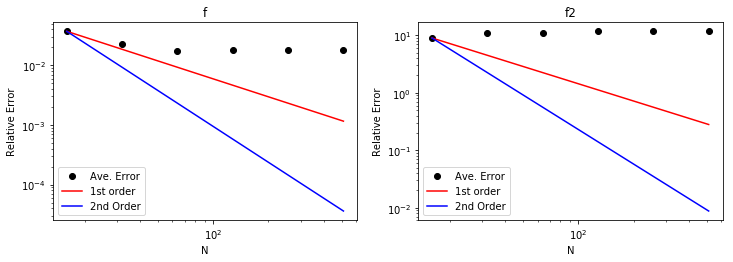

In [7]:
# Original Function
f = lambda t: numpy.sin(t) * numpy.cos(2.0 * t)
N_range = numpy.array([2**n for n in range(4, 10)], dtype=int)
rel_error = numpy.zeros(len(N_range))
t_true = 3.0 * numpy.pi / 2.0

# Compared to another function
f2 = lambda t: numpy.sin(t) - numpy.cos(t)
rel_error2 = numpy.zeros(len(N_range))
t2_true = numpy.pi / 4.0

for (i, N) in enumerate(N_range):
    for j in range(6):
        t = numpy.random.rand(N + 1) * (2.0 * numpy.pi)
        t.sort()
        y = f(t)
        t_star = golden_search([4.0, 5.0], t, y)
        rel_error[i] += numpy.abs(t_star - t_true) / numpy.abs(t_true)

        t2 = numpy.random.rand(N + 1) * (2.0 * numpy.pi) + 0.25 * numpy.pi
        t2.sort()
        y2 = f2(t2)
        t2_star = golden_search([3.0, 10.0], t, y)
        rel_error2[i] += numpy.abs(t2_star - t2_true) / numpy.abs(t2_true)
    rel_error[i] /=6
    rel_error2[i] /= 6 
    
order_C = lambda N, error, order: numpy.exp(numpy.log(error) - order * numpy.log(N))
    
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)

axes = fig.add_subplot(2, 2, 1)
axes.loglog(N_range, rel_error, 'ko', label="Ave. Error")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -1.0) * N_range**(-1.0), 'r', label="1st order")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -2.0) * N_range**(-2.0), 'b', label="2nd Order")
axes.set_title("f")
axes.set_xlabel("N")
axes.set_ylabel("Relative Error")
axes.legend()
#f2
axes = fig.add_subplot(2, 2, 2)
axes.loglog(N_range, rel_error2, 'ko', label="Ave. Error")
axes.loglog(N_range, order_C(N_range[0], rel_error2[0], -1.0) * N_range**(-1.0), 'r', label="1st order")
axes.loglog(N_range, order_C(N_range[0], rel_error2[0], -2.0) * N_range**(-2.0), 'b', label="2nd Order")
axes.set_xlabel("N")
axes.set_ylabel("Relative Error")
axes.set_title("f2")
axes.legend()

plt.show()

The linear convergence of first and second order does not go well. Probably because the golden search region should be refined with initial guess.

## Question 3 - Inverse Quadratic Interpolation

Let us see if we can extend the idea of the secant method to a higher order version.  The idea then is to take 3 values of the function such that $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ and fit an inverse quadratic function through these points (note that this requires that $f(x_i) \neq f(x_j) \forall i \neq j$).  The inverse function can be written as
$$
    g(y) = x_2 + \frac{(y - f(x_1)) (y - f(x_2))(x_0 - x_2)}{(f(x_0) - f(x_1))(f(x_0) - f(x_2))} + \frac{(y - f(x_0)) (y - f(x_2))(x_1 - x_2)}{(f(x_1) - f(x_0))(f(x_1) - f(x_2))}
$$
Inverse quadratic interpolation is one of the core components of many root solvers in libraries such as `numpy`.

Using this new function answer the following questions.

**(a)** [10] Find the x-intercept of the function $g(y)$.

Solution: Basically, the method uses the quadratic function of variable y.

Therefore, we have y=0, and let x$_3$ be the x-intercept to get:

$$
\begin{align}
    x_3 = x_2 + \frac{f(x_1)f(x_2)(x_0 - x_2)}{(f(x_0) - f(x_1))(f(x_0) - f(x_2))} + \frac{f(x_0)f(x_2)(x_1 - x_2)}{(f(x_1) - f(x_0))(f(x_1) - f(x_2))}
\end{align}
$$

**(b)** [10] Write down the resulting iteration so that it has the form
$$
    x_{n+1} = x_n + \phi(x_n, x_{n-1}, x_{n-2})
$$
where $\phi(x_n, x_{n-1}, x_{n-2})$ can also contain evaluations of the original function $f(x)$.

Solution: it is straightforward if we replace certain variables in the equation:

$$
\begin{align}
    x_{n+1} = x_n + \frac{f(x_{n-1})f(x_n)(x_{n-2} - x_n)}{(f(x_{n-2}) - f(x_{n-1}))(f(x_{n-2}) - f(x_n))} + \frac{f(x_{n-2})f(x_n)(x_{n-1} - x_n)}{(f(x_{n-1}) - f(x_{n-2}))(f(x_{n-1}) - f(x_n))}
\end{align}
$$

**(c)** [5] Write a function that implements the inverse quadratic interpolation root finding method which takes in a function $f$ and an initial triplet for an initial guess $(x_0, x_1, x_2)$.  Make sure that it handles the case when the maximum number of steps is taken.

In [8]:
def inv_quad_root(f, x, tolerance=1e-4, max_steps=100):
    """Find a root of f(x) using inverse quadratic interpolation
    
    :Input:
     - *f* (func) Function to find the root of.
     - *x* (list) A triplet of values to be used to start the method.  Note
       that the triplet starts with the x_0 value and ends with the x_2 value
       in terms of the iteration scheme.
     - *tolerance* (float) Tolerance used as a stopping criteria with 
       |f(x_n)| < tolerance.
     - *max_steps* (int) Maximum number of steps allowed.  Raise an exception
       if max_steps are reached.
    :Output:
     - (float) Converged root.
    """
    # Starting

    success = False
    for n in range(1, max_steps + 1):
        x3 = x[2] + (f(x[1]) * f(x[2]) *(x[0] - x[2]))/((f(x[0]) - f(x[1])) * (f(x[0]) - f(x[2]))) + (f(x[0]) * f(x[2]) * (x[1] - x[2])) / ((f(x[1]) - f(x[0])) * (f(x[1]) - f(x[2])))
        x[0] = x[1]
        x[1] = x[2]
        x[2] = x3
        if numpy.abs(f(x[2])) < tolerance:
            success = True
            break

    if n == max_steps:
        raise ValueError("Reached maximum number of steps!")
    
    return x[2]

In [9]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
f = lambda r, A=A, m=m, P=P, n=n: A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)
root = inv_quad_root(f, [0.06, 0.07, 0.08], tolerance=1e-6, max_steps=10)
print("Found root = %s" % root)
numpy.testing.assert_allclose(root, 0.08985602483470391, atol=1e-5)
print("Success!")

Found root = 0.08985602483470391
Success!


## Question 4 - Halley's Method

Newton's method uses the first two terms in the Taylor series of $f(x)$ to find the root.  Halley's method takes this one step further using the first three terms. 

**(a)** [10]  Derive a quadratic expression for the value of $\Delta x$ but do not solve directly for $\Delta x$ yet, i.e. you need only have an expression that include $\Delta x$ in it.

Solution: Expand the function and take a second-order taylor series,

$$
\begin{align}
    f(x) = f(x_k) + f'(x_k) (x - x_k) + \frac{f''(x_k)}{2!} (x - x_k)^2 + \mathcal{O}((x-x_k)^3)
\end{align}
$$

Let $\Delta x$ be the update to the $x_{k+1}$ iteration such that
$$
    x_{k+1} = x_k + \Delta x
$$

and evaluate our expression for $f(x)$ at $x_{k+1}$:
$$
    f(x_{k+1}) = f(x_k) + f'(x_k) \Delta x + \frac{f''(x)}{2!} \Delta x^2 + \mathcal{O}(\Delta x^3)
$$

Now assume that $x_{k+1} = x^\ast$, and we get
$$
    0 = f(x_k) + f'(x_k) \Delta x + \frac{f''(x_k)}{2!} \Delta x^2
$$
which is the quadratic expression.

**(b)** [10] Using the expression from part (a) factor one of the $\Delta x$s out of the expression and replace the remaining one with the approximation for $\Delta x$ from Newton's method.

Solution: Now factoring $\Delta x$ and we get
$$
    0 = f(x_k) + (\Delta x)[f'(x_k) \Delta x + \frac{f''(x_k)}{2!} \Delta x]
$$
Then 
$$
    \Delta x = - \frac{f(x_k)}{f'(x_k) + \frac{f''(x_k)}{2!} \Delta x}
$$
Using the result from Newton's Method,
$$
    \Delta x = - \frac{f(x_k)}{f'(x_k)}
$$
Gives
$$
    x_{k+1} = x_k - \frac{2 ~f(x_k) ~f'(x_k)}{2 ~[f'(x_k)]^2 - f(x_k)~f''(x_k)}
$$

which is the Halley iteration we need.

**(c)** [5] Write a function that implements Halley's method taking in $f(x)$, $f'(x)$, and $f''(x)$ and an initial guess.  Make sure to handle the case when the maximum number of steps is reached.

In [10]:
def halleys_method(f, f_prime, f_dbl_prime, x, tolerance=1e-4, max_steps=100):
    """Find a root of f(x) using Halley's method
    
    :Input:
     - *f* (func) Function to find the root of.
     - *f_prime (func) Derivative of *f*.
     - *f_dbl_prime (func) Second derivative of *f*
     - *x* (float) Starting value of iteration.
     - *tolerance* (float) Tolerance used as a stopping criteria with 
       |f(x_n)| < tolerance.
     - *max_steps* (int) Maximum number of steps allowed.  Raise an exception
       if max_steps are reached.
    :Output:
     - (float) Converged root.
    """
    for n in range(1, max_steps+1):
        x = x - 2 * f(x) * f_prime(x) / (2 * f_prime(x) * f_prime(x) - f(x) * f_dbl_prime(x) )
        if numpy.abs(f(x)) < tolerance:
            break
    
    if n == max_steps:
        raise ValueError("Reached maximum number of steps.")
        

    return x

In [11]:
import sympy
r, P, m, A, n = sympy.symbols('r P m A n')
f = A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)
f = f.subs({P: 1500.0, m: 12, n:20, A: 1e6})
f_prime = sympy.lambdify(r, f.diff(r))
f_dbl_prime = sympy.lambdify(r, f.diff(r, 2))
f = sympy.lambdify(r, f)

root = halleys_method(f, f_prime, f_dbl_prime, 0.08, tolerance=1e-8, max_steps=20)
print("Found root = %s" % root)
numpy.testing.assert_allclose(root, 0.08985602483470805, atol=1e-8)
print("Success!")

Found root = 0.08985602483470805
Success!
